## Model 1 : LSTM

/Users/yyq/myenv_clean/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0071 - val_loss: 0.0035
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.9788e-04 - val_loss: 0.0016
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.7049e-04 - val_loss: 0.0025
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.7540e-04 - val_loss: 0.0015
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.7567e-04 - val_loss: 0.0016
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
LSTM - RMSE: 5.99, MAE: 4.39, MAPE: 6.79%


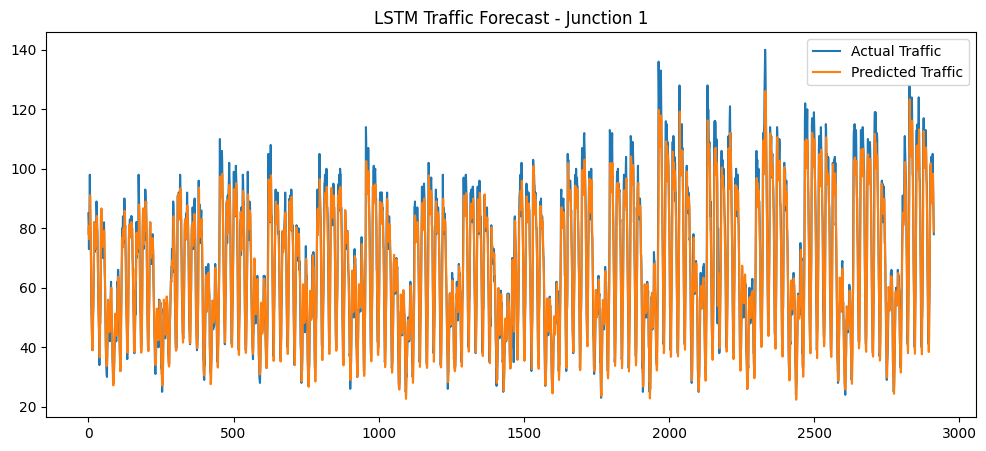

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load traffic data
traffic_df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
traffic_df = traffic_df[traffic_df['Junction'] == 1].sort_values('DateTime')

# Prepare target variable
data = traffic_df['Vehicles'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled)

# Split data
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

# LSTM model
model = Sequential([
    LSTM(64, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)

# Predict and inverse scale
y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)

# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Output
print(f'LSTM - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Traffic')
plt.plot(y_pred, label='Predicted Traffic')
plt.title('LSTM Traffic Forecast - Junction 1')
plt.legend()
plt.show()


## Model 2 : GRU

/Users/yyq/myenv_clean/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0110 - val_loss: 0.0036
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 9.9700e-04 - val_loss: 0.0016
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


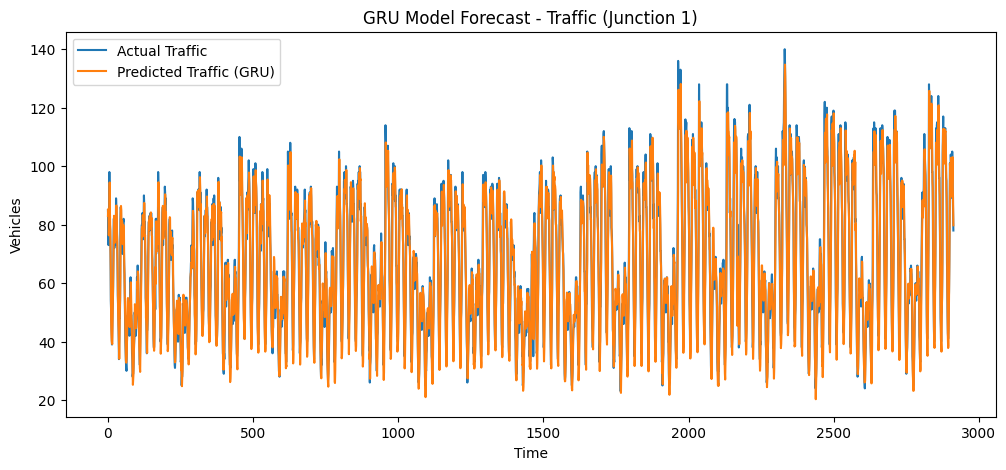

GRU - RMSE: 6.11, MAE: 4.49, MAPE: 7.11%


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load traffic dataset
df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
df = df[df['Junction'] == 1].sort_values('DateTime')

# Target variable
vehicle_data = df['Vehicles'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
vehicle_scaled = scaler.fit_transform(vehicle_data)

# Create sequences
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

X, y = create_sequences(vehicle_scaled, window=30)

# Split data
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

# Build GRU model
model = Sequential([
    GRU(64, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Predict and inverse scale
y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Traffic')
plt.plot(y_pred, label='Predicted Traffic (GRU)')
plt.title('GRU Model Forecast - Traffic (Junction 1)')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# Evaluate
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'GRU - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 3 : Transformer

Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0169 - val_loss: 0.0193
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0076 - val_loss: 0.0207
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0073 - val_loss: 0.0185
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0072 - val_loss: 0.0190
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0070 - val_loss: 0.0195
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0071 - val_loss: 0.0197
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0072 - val_loss: 0.0184
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0070 - val_loss: 0.0189
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0071 - val_loss: 0.0175
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0067 - val_loss: 0.0211
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


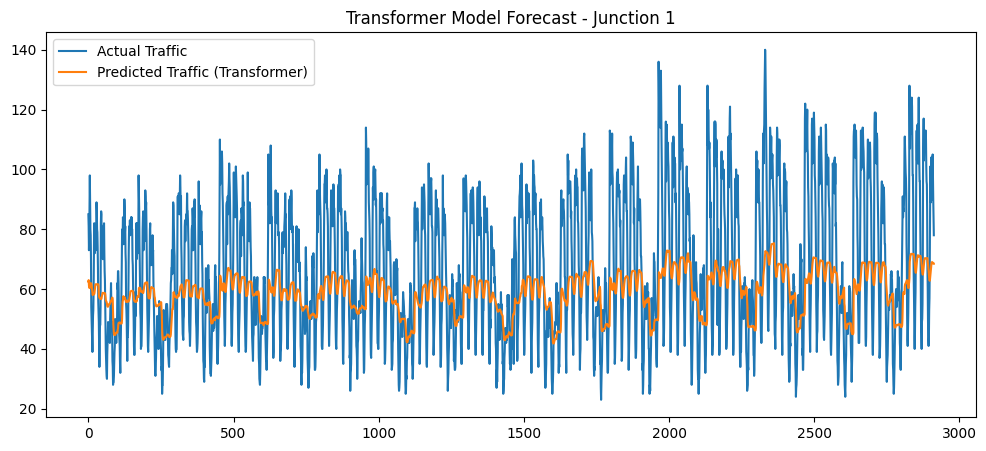

Transformer - RMSE: 21.94, MAE: 18.02, MAPE: 27.43%


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load traffic data
df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
df = df[df['Junction'] == 1].sort_values('DateTime')

# Target: Vehicle count
traffic_data = df['Vehicles'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
traffic_scaled = scaler.fit_transform(traffic_data)

# Create sequences
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(traffic_scaled, window=30)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

# Transformer block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

# Build model
embed_dim = 32
num_heads = 2
ff_dim = 64

inputs = layers.Input(shape=(X.shape[1], 1))
x = layers.Dense(embed_dim)(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(20, activation="relu")(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mse")

# Train
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Predict and inverse scale
y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Traffic')
plt.plot(y_pred, label='Predicted Traffic (Transformer)')
plt.title('Transformer Model Forecast - Junction 1')
plt.legend()
plt.show()

# Evaluate
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'Transformer - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 4 : TCN

/Users/yyq/myenv_clean/lib/python3.12/site-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.6486 - val_loss: 0.0025
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0011 - val_loss: 0.0080
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0012 - val_loss: 0.0123
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0012 - val_loss: 0.3929
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


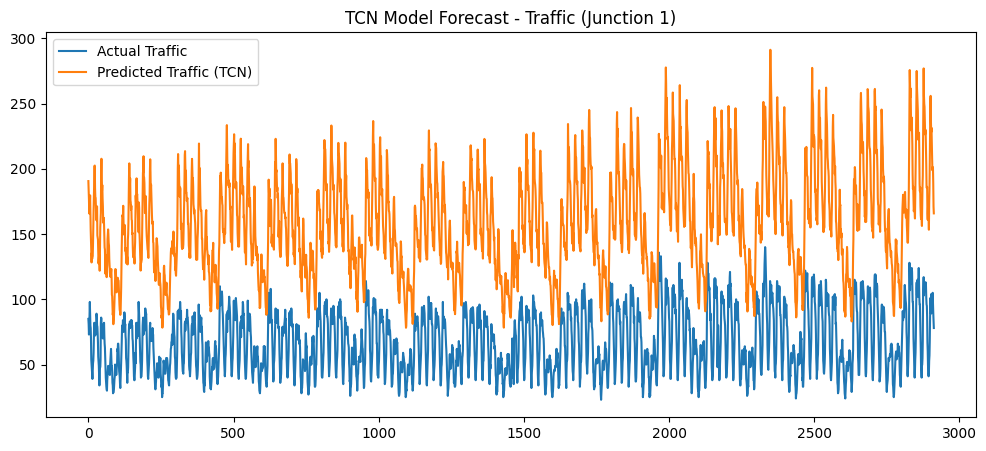

TCN - RMSE: 94.65, MAE: 91.54, MAPE: 150.52%


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from tcn import TCN

# Load and preprocess traffic data
df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
df = df[df['Junction'] == 1]
df = df.sort_values('DateTime')

vehicle_data = df['Vehicles'].values.reshape(-1, 1)
scaler = MinMaxScaler()
vehicle_scaled = scaler.fit_transform(vehicle_data)

# Create sequences
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(vehicle_scaled)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

# Build and train TCN model
model = Sequential()
model.add(TCN(input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Predict and inverse scale
y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Traffic')
plt.plot(y_pred, label='Predicted Traffic (TCN)')
plt.title('TCN Model Forecast - Traffic (Junction 1)')
plt.legend()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'TCN - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 5: N-BEATS

| N-Beats
| --  Stack Trend (#0) (share_weights_in_stack=False)
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=30, forecast_length=1, share_thetas=True) at @11257352544
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=30, forecast_length=1, share_thetas=True) at @11249751328
| --  Stack Seasonality (#1) (share_weights_in_stack=False)
     | -- SeasonalityBlock(units=128, thetas_dim=1, backcast_length=30, forecast_length=1, share_thetas=True) at @11314476000
     | -- SeasonalityBlock(units=128, thetas_dim=1, backcast_length=30, forecast_length=1, share_thetas=True) at @11314165904


/Users/yyq/myenv_clean/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/yyq/myenv_clean/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([59, 1, 1])) that is different to the input size (torch.Size([59, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 0.0169
Epoch 2, Loss: 0.0163
Epoch 3, Loss: 0.0162
Epoch 4, Loss: 0.0163
Epoch 5, Loss: 0.0163
Epoch 6, Loss: 0.0162
Epoch 7, Loss: 0.0163
Epoch 8, Loss: 0.0162
Epoch 9, Loss: 0.0162
Epoch 10, Loss: 0.0162


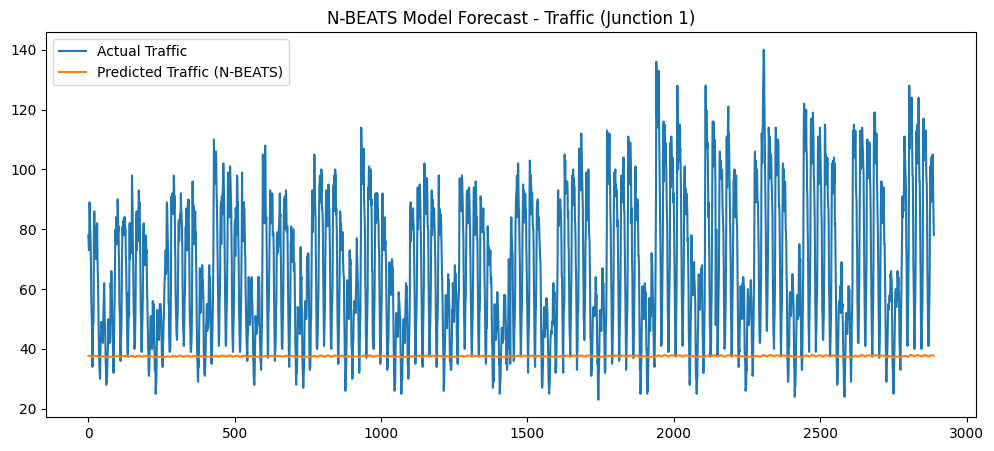

N-BEATS - RMSE: 37.81, MAE: 30.50, MAPE: 39.09%


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from nbeats_pytorch.model import NBeatsNet

# Load and filter traffic data
df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
df = df[df['Junction'] == 1].sort_values('DateTime')

vehicle_data = df['Vehicles'].values.reshape(-1, 1)
scaler = MinMaxScaler()
vehicle_scaled = scaler.fit_transform(vehicle_data)

# Sequence settings
WINDOW = 30
HORIZON = 1

# PyTorch dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, window, horizon):
        self.X, self.y = [], []
        for i in range(len(data) - window - horizon + 1):
            self.X.append(data[i:i+window])
            self.y.append(data[i+window:i+window+horizon])
        self.X = np.array(self.X)
        self.y = np.array(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

# Train/test split
split = int(len(vehicle_scaled) * 0.8)
train_dataset = TimeSeriesDataset(vehicle_scaled[:split], WINDOW, HORIZON)
val_dataset = TimeSeriesDataset(vehicle_scaled[split:], WINDOW, HORIZON)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Model setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NBeatsNet(
    stack_types=('trend', 'seasonality'),
    nb_blocks_per_stack=2,
    forecast_length=HORIZON,
    backcast_length=WINDOW,
    thetas_dim=(4, 8),
    hidden_layer_units=128
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Training
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    train_losses = []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        backcast, forecast = model(X_batch)
        loss = loss_fn(forecast, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    print(f"Epoch {epoch+1}, Loss: {np.mean(train_losses):.4f}")

# Evaluation
model.eval()
predictions, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        _, forecast = model(X_batch)
        predictions.extend(forecast.cpu().numpy())
        actuals.extend(y_batch.numpy())

# Inverse scale
y_pred = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_true = scaler.inverse_transform(np.array(actuals).reshape(-1, 1))

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Traffic')
plt.plot(y_pred, label='Predicted Traffic (N-BEATS)')
plt.title('N-BEATS Model Forecast - Traffic (Junction 1)')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'N-BEATS - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 6: ARIMA

/Users/yyq/myenv_clean/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yyq/myenv_clean/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


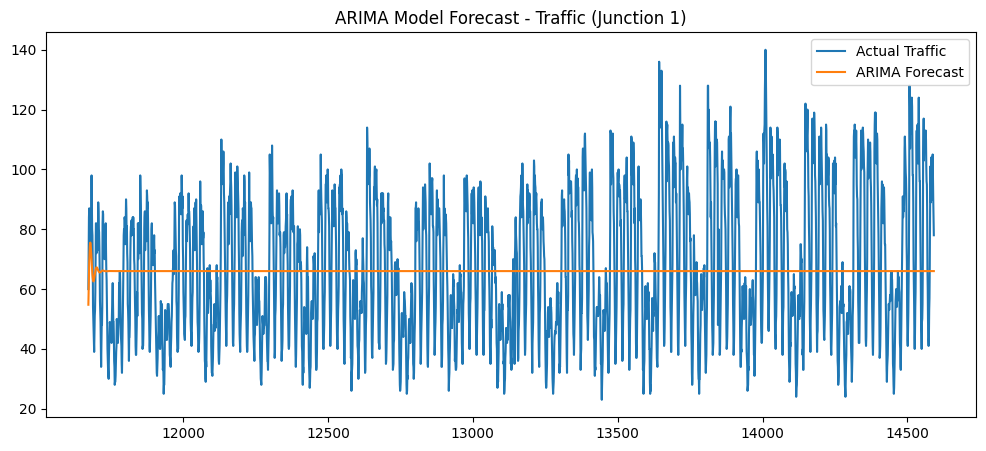

ARIMA - RMSE: 23.63, MAE: 20.34, MAPE: 35.08%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and filter traffic data
df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
df = df[df['Junction'] == 1].sort_values('DateTime')

# Target variable: hourly vehicle count
train_size = int(len(df) * 0.8)
train, test = df['Vehicles'][:train_size], df['Vehicles'][train_size:]

# Fit ARIMA model (adjust p,d,q if needed)
model = ARIMA(train, order=(5, 1, 2)) 
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot forecast vs actual
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual Traffic')
plt.plot(test.index, forecast.values, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast - Traffic (Junction 1)')
plt.legend()
plt.show()

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test.values - forecast.values) / test.values)) * 100

print(f'ARIMA - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 7: SARIMA

/Users/yyq/myenv_clean/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/yyq/myenv_clean/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


SARIMA - RMSE: 19.32, MAE: 14.94, MAPE: 29.22%


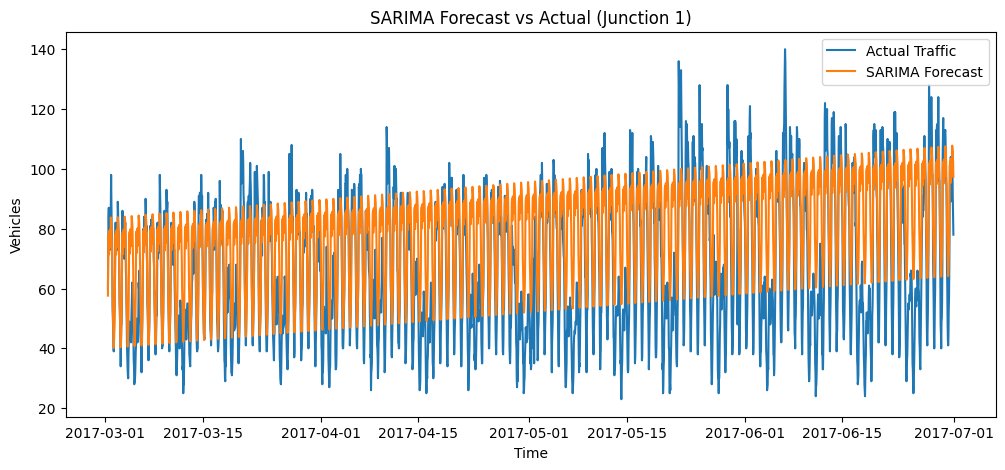

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the data
df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
df = df[df['Junction'] == 1].sort_values('DateTime')

# Set DateTime as index
df.set_index('DateTime', inplace=True)

# Split into train/test
train_size = int(len(df) * 0.8)
train, test = df['Vehicles'][:train_size], df['Vehicles'][train_size:]

# Fit SARIMA model (s = 24 for hourly seasonality)
model = SARIMAX(train, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 24),  # Daily seasonality for hourly data
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=len(test))

# Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Print metrics
print(f'SARIMA - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')

# Plot forecast vs actual
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual Traffic')
plt.plot(test.index, forecast.values, label='SARIMA Forecast')
plt.title('SARIMA Forecast vs Actual (Junction 1)')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()


## Model 8: Prophet

/Users/yyq/myenv_clean/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
19:45:23 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/yyq/myenv_clean/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


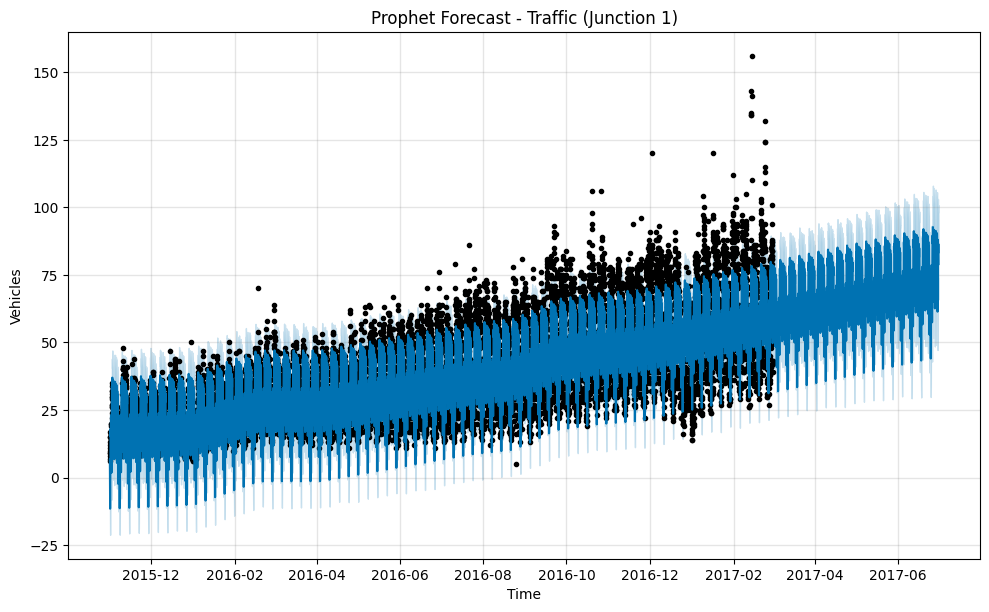

Prophet - RMSE: 13.42, MAE: 11.26, MAPE: 19.94%


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load and filter the data
df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
df = df[df['Junction'] == 1].sort_values('DateTime')

# Prepare data for Prophet
df_prophet = df[['DateTime', 'Vehicles']].rename(columns={'DateTime': 'ds', 'Vehicles': 'y'})

# Split into train and test
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]

# Fit Prophet model
model = Prophet()
model.fit(train_df)

# Forecast
future = model.make_future_dataframe(periods=len(test_df), freq='H')
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title('Prophet Forecast - Traffic (Junction 1)')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.show()

# Evaluate
pred = forecast[['ds', 'yhat']].set_index('ds').iloc[-len(test_df):]
actual = test_df.set_index('ds')

rmse = np.sqrt(mean_squared_error(actual['y'], pred['yhat']))
mae = mean_absolute_error(actual['y'], pred['yhat'])
mape = np.mean(np.abs((actual['y'] - pred['yhat']) / actual['y'])) * 100

print(f'Prophet - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 9: XGBoost

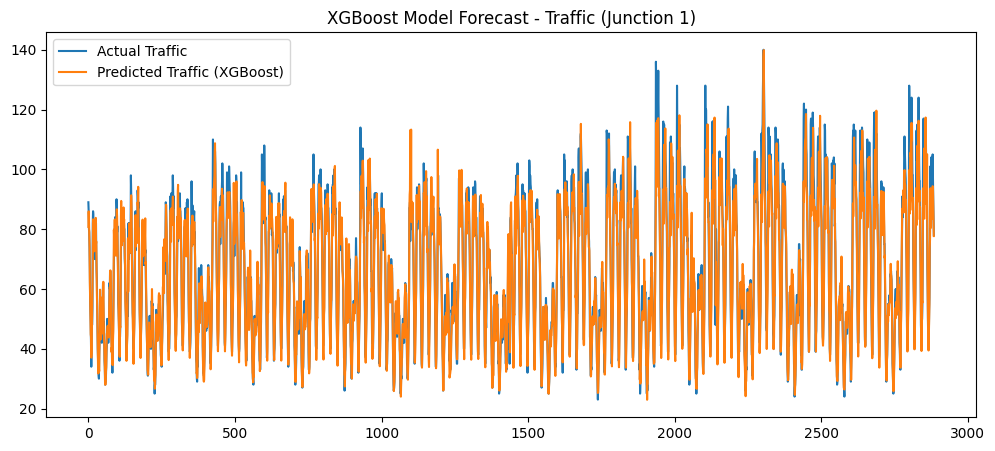

XGBoost - RMSE: 6.72, MAE: 4.56, MAPE: 6.57%


In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load and filter traffic data
df = pd.read_csv('../dataset/traffic.csv', parse_dates=['DateTime'])
df = df[df['Junction'] == 1].sort_values('DateTime')

# Create lag features and date-based features
df['lag_1'] = df['Vehicles'].shift(1)
df['lag_24'] = df['Vehicles'].shift(24)       # previous day same hour
df['lag_168'] = df['Vehicles'].shift(168)     # previous week same hour

df['hour'] = df['DateTime'].dt.hour
df['dayofweek'] = df['DateTime'].dt.dayofweek

df = df.dropna()

# Define features and target
features = ['lag_1', 'lag_24', 'lag_168', 'hour', 'dayofweek']
target = 'Vehicles'

X = df[features]
y = df[target]

# Train/test split (time-aware)
train_size = int(len(X) * 0.8)
X_train, X_val = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_val.values, label='Actual Traffic')
plt.plot(y_pred, label='Predicted Traffic (XGBoost)')
plt.title('XGBoost Model Forecast - Traffic (Junction 1)')
plt.legend()
plt.show()

# Results
print(f'XGBoost - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')
